# Algoritmo de predicción del reto filtro "Data Challenge Industrial 4.0"


# Las librerías de python que se usarán son:


## "numpy", "matplotlib", "pandas", "scikit-learn" y  "math". Importandolas de la siguiente manera

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import math

/home/dante/miniconda3/envs/py27/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/dante/miniconda3/envs/py27/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/dante/miniconda3/envs/py27/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/dante/miniconda3/envs/py27/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/dante/miniconda3/envs/py27/lib/py

Para poder tener un mejor manejo de los datos es conveniente usar "pandas" y convertir los archivos .csv en "dataframes", de esta forma los datos se tienen ordenados en columnas y filas, estas se pueden manipular facilmente 

Comenzando con los datos de entrenamiento (datosEntrenamiento.csv). Este "dataframe" se utilizará para ver la correlación que existe entre cada una de las cuatro primeras columnas con la quinta columna (Objetivo del algoritmo de predicción), tambén servirá para ver si existe correlanción (directa) entre las cuatro primera columnas 

In [3]:
#DE = dataframe del archivo "datosEntrenamiento.csv", las columnas por simplicidad se nombrarán A,B,C,D,E, donde la columna E depende de las otras 4
DE=pd.read_csv('datosEntrenamiento.csv', names=['A','B', 'C','D','E'])

Para apreciar la correlación que tiene cada una de las columnas con E es convieniente realizar un diagrama de dispersión y así observar (al menos) graficamente si hay algúna dependencia

In [4]:
#Aqui se aislan las columnas del "dataframe" "DE" definiendolas como (ej. a=DE["A"]) para la primera columna.
#Para realizar el diagrama de dispersión se convierten esas columnas en arreglos (arrays) 
a=DE["A"]
b=DE["B"]
c=DE["C"]
d=DE["D"]
e=DE["E"]
a1=np.array(a).reshape(-1,1)
b1=np.array(b).reshape(-1,1)
c1=np.array(c).reshape(-1,1)
d1=np.array(d).reshape(-1,1)
e1=np.array(e).reshape(-1,1)

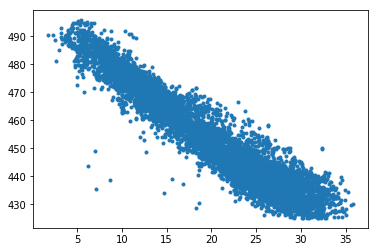

In [5]:
#El comando plt.scatter(variable_independiente,variable_dependiente) se utilizara para los 4 gráficos siguientes
plt.scatter(a1,e1, marker='.')

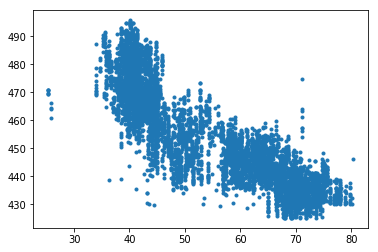

In [6]:
plt.scatter(b1,e1, marker='.')


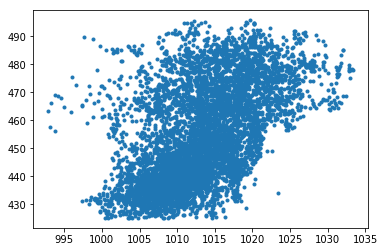

In [7]:
plt.scatter(c1,e1, marker='.')

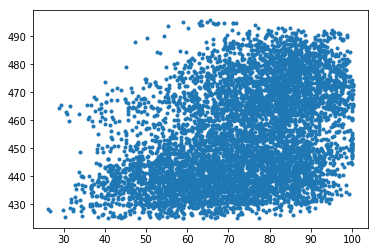

In [8]:
plt.scatter(d1,e1, marker='.')

Se observa que la primera columna de datos guarda una relación lineal con la última, las demás no presentan una correlación (directa) aparente, por lo que se decidide utilizar un modelo de regresión lineal dela primera columna de datos para realizar el algoritmo de regresion-predicción

In [9]:
#Aquí se utiliza la libreria "scikit-learn" para realizar el ajuste lineal, se importa la función "lr" para definir la regresión lineal
# "lr.fit" para realizar el ajuste de los datos

a1 = np.array(a).reshape(-1,1)
e1 = np.array(e).reshape(-1,1)
lr = LinearRegression()
regr = lr.fit(a1, e1)
#e1_pred es la columna que se predecirá según el ajuste realizado anteriormente, lr.fit ha aprendido la relación que existe entre(a1 y e1)
e1_pred = lr.predict(a1)
slope = regr.coef_[0][0]
b = regr.intercept_[0]

Text(0,0.5,'e1')

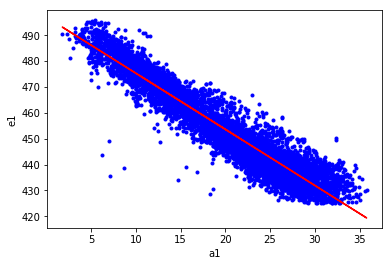

In [11]:
plt.scatter(a1, e1, color='blue', marker='.')
plt.plot(a1, e1_pred, color='red', linewidth=1.5)#es claro que la relación que guarda e1_predict con a1 es una linea recta
plt.xlabel("a1")
plt.ylabel("e1")

Como se mencionó arriba la función "lr.fit" realizó un ajuste aprendiendo de la relación guardada entre a1 y e1, a continuación se verá con el "dataframe"(datosPrueba) la eficiencia y precisión del "aprendizaje" de este ajuste


In [12]:
DP=pd.read_csv('datosPrueba.csv', names=['AP','BP','CP','DP','EP'])
#Se aislan la primera y última columna y se convierten en arrays
A_prueba = np.array(DP['AP']).reshape(-1,1)
E_prueba = np.array(DP['EP']).reshape(-1,1)

In [13]:
lr.score(A_prueba, E_prueba)

0.8965617526570763

lr.score mide la eficiencia del lr.fit. Lo que realiza es tomar  "datos entrenamiento", según la relación que existe generá a partir de A_prueba un conjunto de datos E_prueba2 y compará con E_prueba, teniendo una eficiencia del 89.65% (de los 957 datos coinciden 851)  

In [18]:
E_prueba2=lr.predict(A_prueba)
E_prueba2

array([[483.16629721],
       [449.03284442],
       [441.88913833],
       [433.09521443],
       [443.64792311],
       [474.91520811],
       [448.25116229],
       [445.29814093],
       [456.65424514],
       [431.87926445],
       [458.89072455],
       [473.74268493],
       [477.62938216],
       [458.4564567 ],
       [460.62779594],
       [467.81492881],
       [447.75175427],
       [479.51844729],
       [455.3514416 ],
       [449.44539887],
       [455.95941658],
       [481.40751243],
       [475.19748222],
       [481.64635975],
       [445.73240878],
       [452.91954165],
       [479.8007214 ],
       [438.17614824],
       [467.20695383],
       [429.49079129],
       [467.68464846],
       [466.59897884],
       [435.50540098],
       [463.12483606],
       [445.53698825],
       [462.79913518],
       [455.69885587],
       [422.99848698],
       [459.15128526],
       [471.91875997],
       [434.07231708],
       [435.35340723],
       [466.25156456],
       [435

Por último se probará el algoritmo con los datos de validación, prediciendo por completo la quinta columna de este "dataframe"

In [19]:
DV=pd.read_csv('datosValidacion.csv', names=['AV','BV','CV','DV','EV'])
DV

,AV,BV,CV,DV,EV
0,28.31,50.05,1005.75,50.17,NaN
1,31.71,69.04,1008.79,49.32,NaN
2,15.87,45.00,1021.92,40.00,NaN
3,10.32,40.35,1011.64,84.05,NaN
4,21.19,42.48,1013.43,80.52,NaN
5,13.60,39.82,1013.34,86.10,NaN
6,27.55,68.08,1011.42,60.71,NaN
7,23.85,74.22,1009.99,82.72,NaN
8,13.56,39.18,1023.40,63.82,NaN
9,19.72,65.94,1010.53,82.12,NaN


In [20]:
#Se convierte AV en un array
A_Val= np.array(DV['AV']).reshape(-1,1)

In [21]:
#Esto dará la quinta columna para el set "datosValidacion.csv"
respuesta = lr.predict(A_Val)

In [22]:
respuesta

array([[435.57054116],
       [428.18798775],
       [462.58200125],
       ...,
       [437.19904558],
       [451.61673811],
       [431.79241088]])

In [23]:
#verificando que en efecto tenga el mismo numero de elementos, 1913 entradas y 1913 salidas
respuesta.shape

(1913, 1)

Como se puede observar los datos de salida no son valores muy alejados de los que ya se tenían en "datosEntrenamiento" y "datosPrueba" por lo que es buena señal y que podemos confiar en el algoritmo de predicción


In [24]:
#se calculará el erro que tiene el algoritmo, primero se calcula el error cuadrático medio y el error porcentual
errorCuad = mean_squared_error(E_prueba, E_prueba2)
error = math.sqrt(errorCuad)
error

5.350758530288611

In [26]:
promedio= np.sum(E_prueba)/957
errorPorcentual = (error*100)/promedio
errorPorcentual

1.1762110902355027

Se tiene un error porcentual del 1.17%, este es consistente con el error que se calculó, 5.35 respecto al promedio de los datos "E_prueba"= 454.91.. 

In [27]:
promedio

454.9148171368861

# Conclusiones

El algoritmo de predicción corresponde a un modelo de regresión lineal, debido a que es la relación más evidente que guarda el dataset "datosEntrenamiento.csv" entre la primera y ultima columna, es tan fuerte esta relación que se obtuvo una eficiencia de 89% en el dataset "datosPrueba", esperando que exista la misma eficiencia para el dataset "datosValidacion.csv". Esto no implica que no pueda ser más eficiente el algoritmo, faltaría encontrar correlaciones ocultas (no directas) con las demás columnas y tener un modelo más preciso 